这个分析笔记由[Jake Vanderplas](http://www.vanderplas.com)编辑汇总. 源代码和license文件在[GitHub](https://github.com/jakevdp/sklearn_tutorial/)。 中文翻译由[派兰数据](http://datarx.cn)在[派兰大数据分析平台](http://palandata.com)上完成。

# 降维：深入探索主成分分析

在本节中我们会探索**主成分分析**的内容，它在线性降维中有着至关重要的作用。

我们首先进行基本的设置：

In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

## 介绍主成分分析

主成分分析是一个非常强大的，用于数据*降维*的无监督学习算法。我们通过两维的一个数据集就可以很直观的看出来。

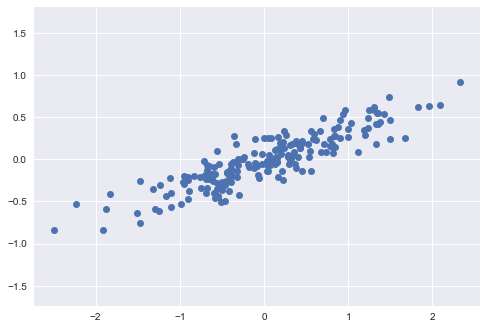

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

我们可以看出这一组数据有一个明显的趋势和走向。主成分分析(PCA)做的就是去寻找这一组数据中的**最基本的轴**，然后去解释这些轴是怎样影响数据分布的：

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[ 0.75871884  0.01838551]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


我们把这些向量画在这些数据上来直观的看一看这些数字是什么意思：

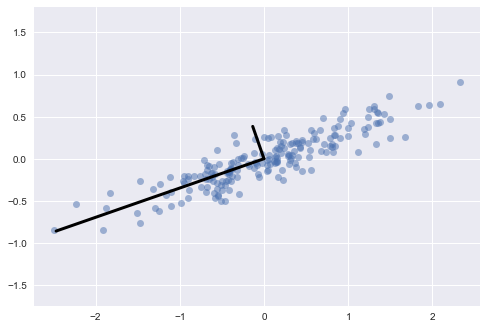

In [4]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

我们注意到一个向量比另一个向量长。从某种意义上来说，它告诉我们这个长向量对应的数据方向比另一个方向要"重要"。方差量化了方向的"重要性"。

从另一个角度来看，数据中的次要成分可以被**完全舍弃**掉而不损失过多的信息损失！我们来看一看如果我们仅保持95%的方差时我们的数据是什么样子的：

In [5]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


当舍弃了5%的方差后，我们的数据现在足足被压缩了一半！我们来看一看压缩过后的数据是什么样子的：

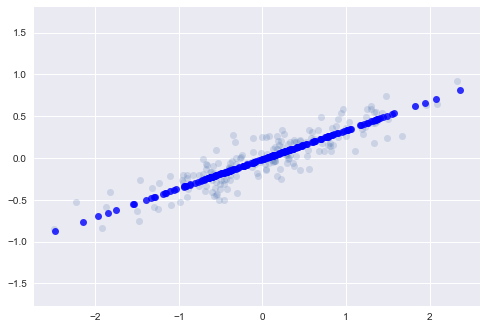

In [6]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

在图中，浅色的点是原始数据，深色的点是经过投射和压缩后的点。我们可以看到，在舍弃了5%的数据方差之后，数据集中最重要的特征被保留了下来，而且我们的数据总量被压缩了一半！

这就是"主成分分析"所做的：如果将数据近似在一个低的维度，您就可以轻松的去观察这个数据或者为这个数据添加更复杂的模型。

### PCA在数字方面的应用

降维算法在两维中的应用似乎有一点抽象，但是降维和投影在需要展示高维数据时非常有用。我们快速的回顾一下我们之前看过的PCA在数字方面的应用：

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [8]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


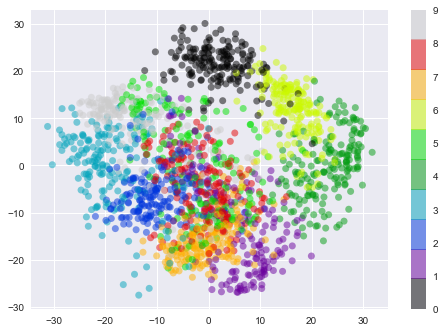

In [9]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

这幅图让我们了解了不同数字之间的差异和关联。更为重要的是，我们找到了一个对64维数据的有效的处理，这个方法让我们不用去了解这些数据的标签，也可以看出这些数字的关联和差异。

### "成分"指的是什么？

主成分分析(PCA)是一个非常有用的降维算法，因为它通过分析数据的*特征向量*，给了数据有一个很直观的表达。

对于图片来说，输入数据可以由一个向量来表示：当我们用数值表示时，我们的数据是这样的

$$
x = [x_1, x_2, x_3 \cdots]
$$

但它表达的实际上是这个意思

$$
image(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots
$$

如果我们在像素空间去实施降维，我们只能得到部分的图片：

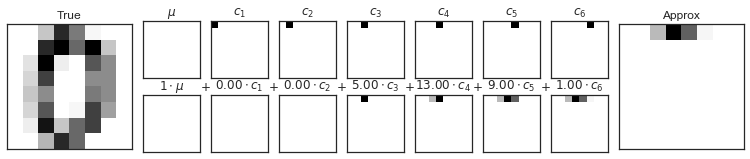

In [10]:
from fig_code.figures import plot_image_components

sns.set_style('white')
plot_image_components(digits.data[0])

但是基于像素的表达并不是唯一的选择。我们还可以选择其他*基函数*，比如

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA做的就是找出这些**基函数**，所以我们只需要很少的信息就能够得到一个效果不错的近似。低维数据的表达是这个序列中的参数，我们通过求和得到我们的近似结果：

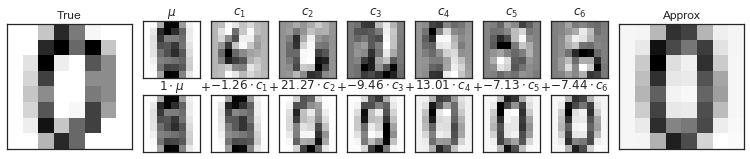

In [11]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

我们可以看到，我们仅仅用6个PCA成分的组合，就得到了相当不错的对输入数据的恢复效果！

因此，我们可以从两个角度来看PCA。我们可以把它当作**降维**的工具，也可以把它当作一个噪声**滤波器**。

### 选择成分的数量

在我们舍弃次要的成分时，我们究竟舍弃了多少信息？我们可以画出**解释方差**，从图中得到我们想要的答案。

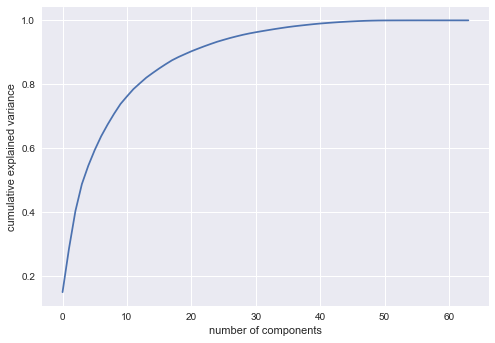

In [12]:
sns.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

从图中我们可以看到，两维的投影让我们丢掉了很多信息，我们几乎需要保留20个成分去保持90%的方差。研究高维数据的这种图片会帮助您理解数据的冗余表达。

### PCA与数据压缩

我们之前提到过，PCA可以被用来作数据压缩的。用一个相对小的``n_components``可以让您用一些基础的向量来完成高维数据的表达。

下面展示的是，当你改变成分的数目的时候，对同一个对象的压缩结果：

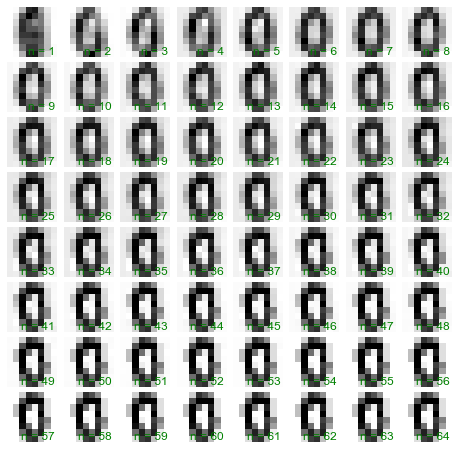

In [13]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

再让我们用IPython的``interact``功能去看一看一些图片的重构：

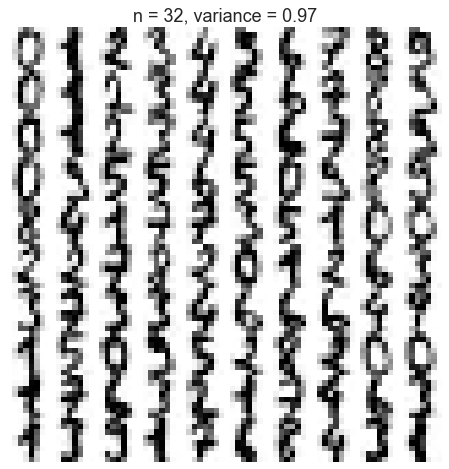

In [14]:
from IPython.html.widgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=[1, 64], nside=[1, 8]);

## 其他的降维算法

Scikit-learn中还有门多其他的无监督学习的方法：有一些希望您可以尝试着去使用。这里还有另一些降维方法供您参考。

- [sklearn.decomposition.PCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.PCA.html): 
   主成分分析
- [sklearn.decomposition.RandomizedPCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html):
   基于随机算法的高速的主成分分析
- [sklearn.decomposition.SparsePCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.SparsePCA.html):
   包含L1正则化惩罚的PCA
- [sklearn.decomposition.FastICA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.FastICA.html):
   独立成分分析
- [sklearn.decomposition.NMF](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.NMF.html):
   非负矩阵因子分解
- [sklearn.manifold.LocallyLinearEmbedding](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html):
   基于邻居算法的非线性流形学习技术
- [sklearn.manifold.IsoMap](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.Isomap.html):
   基于稀疏图算法的非线性流形学习算法

每一个都有它的优点、缺点和适用的方面。您可以在 [scikit-learn website](http://sklearn.org) 上面详细的了解它们。